In [4]:
import numpy as np 
import pandas as pd 
import os


In [5]:

df = pd.read_csv(r"C:\Users\jahna\Downloads\archive1\netflix_titles.csv")


In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.shape

(8807, 12)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df['director']= df['director'].fillna('unknown')

In [13]:
df['cast'] = df['cast'].fillna('unknown')

In [14]:
df['country'] = df['country'].fillna('unknown')

In [15]:
df['rating'] = df['rating'].fillna('unknown')

In [16]:
df['title'].duplicated().sum()


np.int64(0)

In [17]:
df[['duration_num', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_num'] = df['duration_num'].astype(float) 


In [18]:
df['country_list']= df['country'].str.split(',')

In [19]:
df['date_added'] = df['date_added'].str.strip()

In [20]:
df['date_added']= pd.to_datetime(df['date_added'],errors='coerce')



In [21]:
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['day_added']=df['date_added'].dt.month

In [22]:
df_exploded = df.explode('country_list')
counts = df_exploded.groupby(['director', 'country_list']).size().reset_index(name='movie_count')
counts.head()

,director,country_list,movie_count
0,A. L. Vijay,India,2
1,A. Raajdheep,India,1
2,A. Salaam,India,1
3,A.R. Murugadoss,India,1
4,A.R. Murugadoss,unknown,1


In [23]:
top_countries = df_exploded['country_list'].value_counts().head(10).index.tolist()
df_top_countries = df_exploded[df_exploded['country_list'].isin(top_countries)]

In [24]:
# Group by release year, type, and country to count the occurrences
type_year_counts_top_countries = df_top_countries.groupby(['release_year', 'type', 'country_list']).size().reset_index(name='count')


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
df_filtered_years = df_top_countries[(df_top_countries['release_year'] >= 2011) & (df_top_countries['release_year'] <= 2021)]
type_year_counts_top_countries = df_filtered_years.groupby(['release_year', 'type', 'country_list']).size().reset_index(name='count')




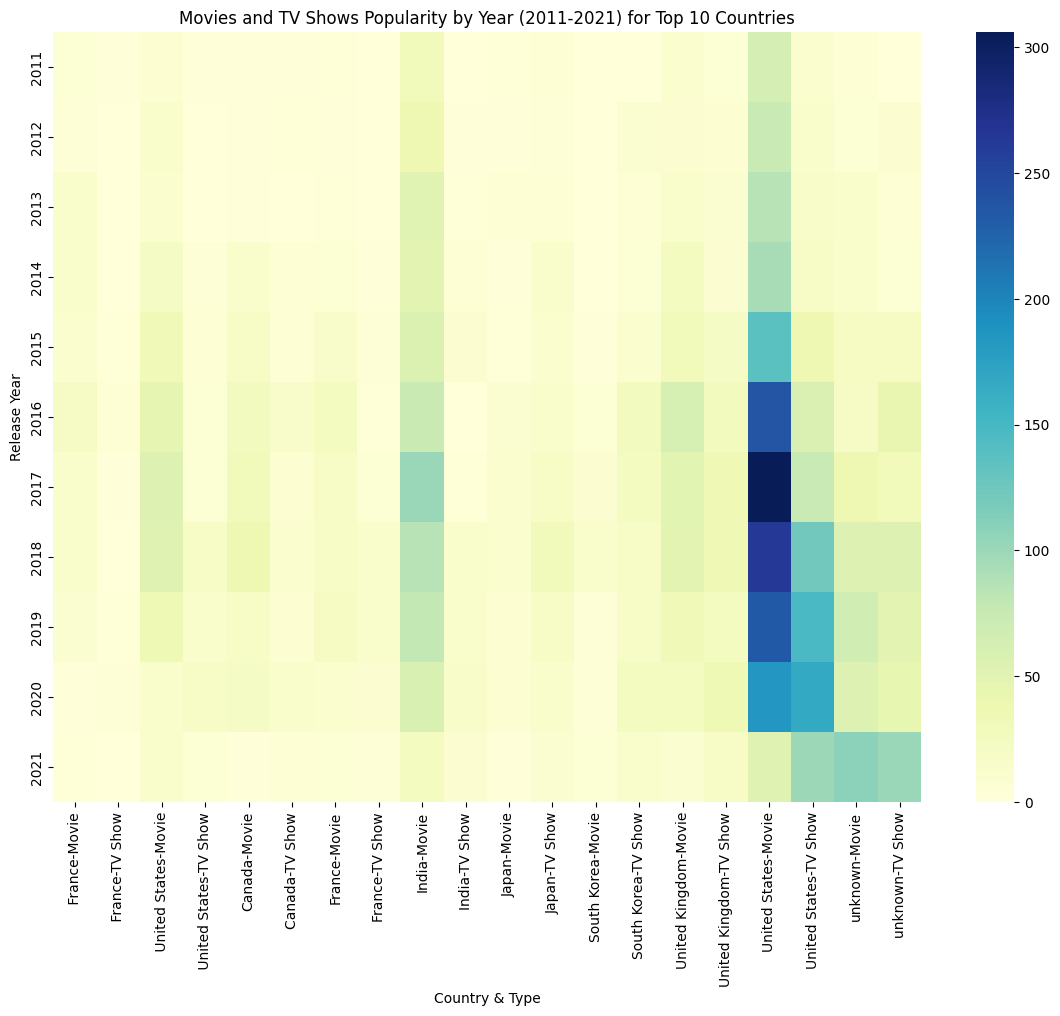

In [28]:
heatmap_data = type_year_counts_top_countries.pivot_table(index='release_year', columns=['country_list', 'type'], values='count', fill_value=0)

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar=True)
plt.title('Movies and TV Shows Popularity by Year (2011-2021) for Top 10 Countries')
plt.xlabel('Country & Type')
plt.ylabel('Release Year')
plt.show()

C:\Users\jahna\AppData\Local\Temp\ipykernel_3932\1795941826.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='release_year', y='count', hue='type', data=type_year_counts_top_countries, ci=None)


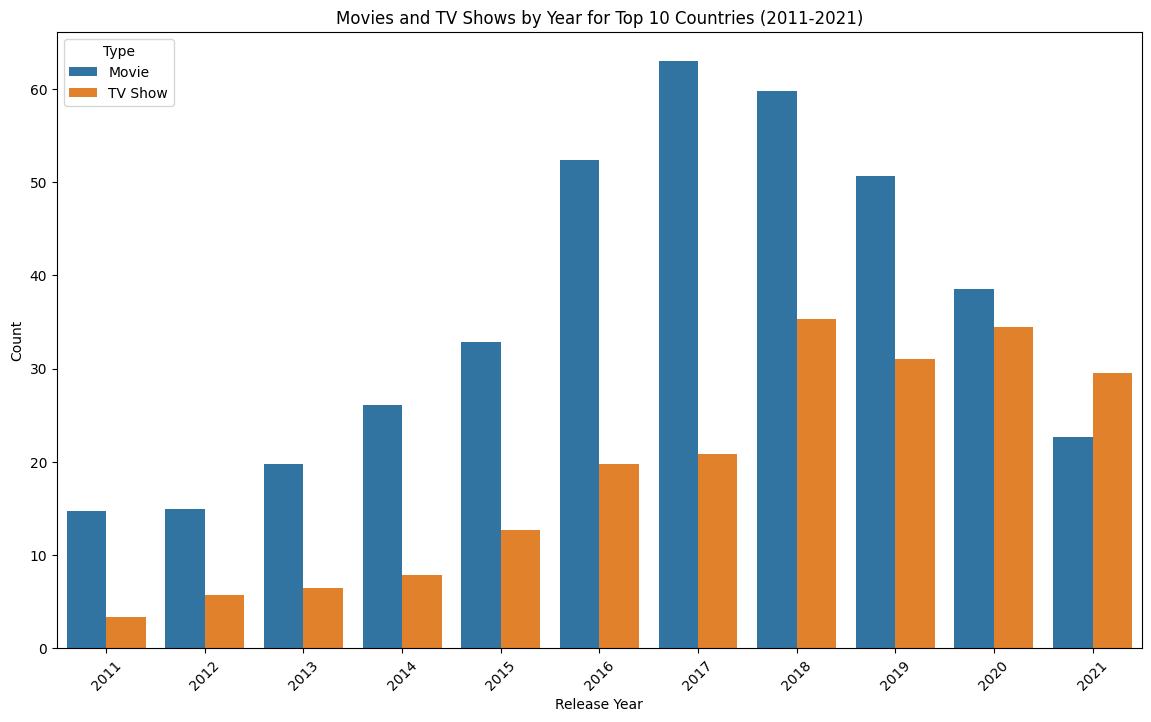

In [29]:
plt.figure(figsize=(14, 8))
sns.barplot(x='release_year', y='count', hue='type', data=type_year_counts_top_countries, ci=None)

plt.title("Movies and TV Shows by Year for Top 10 Countries (2011-2021)")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type", loc="upper left")
plt.show()

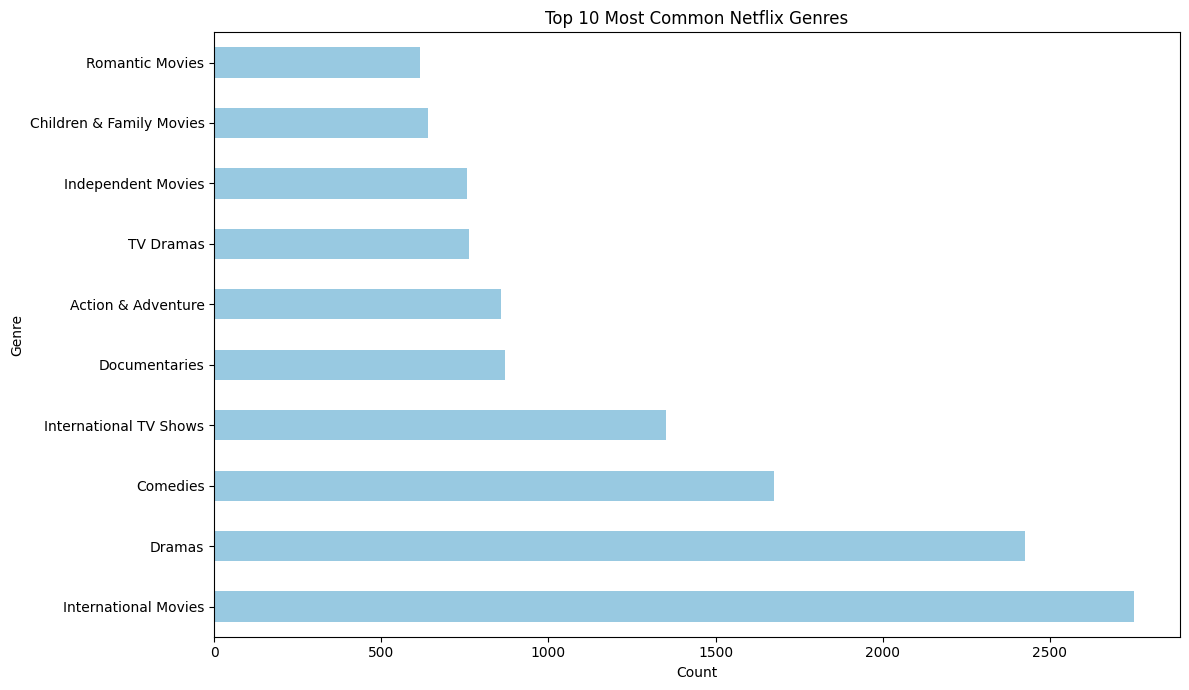

In [30]:
# Split the genres and count occurrences
genre_counts = df['listed_in'].str.split(', ', expand=True).stack().value_counts()

# Plotting
plt.figure(figsize=(12, 7))
genre_counts.head(10).plot(kind='barh', color='#98C9E1')
plt.title('Top 10 Most Common Netflix Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()
